<a href="https://colab.research.google.com/github/MISHTI100/Crop-/blob/main/Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('crop.csv')

In [ ]:
dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
dataset.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
dataset.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values = np.nan, strategy ='mean')
dataset[['temperature','humidity','ph','rainfall']]=imputer_mean.fit_transform(dataset[['temperature','humidity','ph','rainfall']]).astype('object')

In [ ]:
dataset[['temperature','humidity','ph','rainfall']] = dataset[['temperature','humidity','ph','rainfall']].astype("float")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data= dataset.drop(columns=['label','P','K'])

In [ ]:
data

,N,temperature,humidity,ph,rainfall
0,90,20.879744,82.002744,6.502985,202.935536
1,85,21.770462,80.319644,7.038096,226.655537
2,60,23.004459,82.320763,7.840207,263.964248
3,74,26.491096,80.158363,6.980401,242.864034
4,78,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...
2195,107,26.774637,66.413269,6.780064,177.774507
2196,99,27.417112,56.636362,6.086922,127.924610
2197,118,24.131797,67.225123,6.362608,173.322839
2198,117,26.272418,52.127394,6.758793,127.175293


In [ ]:
data.tail(10)

,N,temperature,humidity,ph,rainfall
2190,103,27.309018,55.196224,6.348316,141.483164
2191,118,27.548230,62.881792,6.123796,181.417081
2192,106,25.627355,57.041511,7.428524,188.550654
2193,116,23.292503,50.045570,6.020947,183.468585
2194,97,24.914610,53.741447,6.334610,166.254931
2195,107,26.774637,66.413269,6.780064,177.774507
2196,99,27.417112,56.636362,6.086922,127.924610
2197,118,24.131797,67.225123,6.362608,173.322839
2198,117,26.272418,52.127394,6.758793,127.175293
2199,104,23.603016,60.396475,6.779833,140.937041


In [ ]:
y = data.iloc[:,0].values
x = data.drop(columns = data.columns[0]).values


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [ ]:
print(x_train)

[[ 23.80834611  83.91902605   6.6912681   70.97358303]
 [ 41.94865736  81.15595212   5.63832848  73.06862952]
 [ 29.39982732  64.25510719   7.10845012  67.47677295]
 ...
 [ 28.47442276  63.53604453   6.50014496  69.5274407 ]
 [ 25.43459777  69.12613376   7.6859593   41.02682925]
 [ 17.24944623  91.13772765   6.54319181 112.5090516 ]]


In [ ]:
print(x_test)

[[ 26.2148837   87.6883982    6.41905219  59.65590798]
 [ 24.64458469  85.49938185   6.34394252  48.31219031]
 [  9.72445761  83.74765639   6.15868941  74.46411148]
 ...
 [ 23.32293161  53.00366334   7.16709259 168.2644287 ]
 [ 29.69952329  95.21224392   6.34246371 148.3003692 ]
 [ 24.692258    93.87030088   6.29790758 104.6735454 ]]


In [ ]:
print(y_train)

[134  29  25 ...  35  39  14]


In [ ]:
print(y_test)

[105  91  14  52  32  61  11  22 106  93  25  97  36  27  34  32 101  34
  85  28   0  50  32  90 131 107  15  13   6  12  37  63  71 100  29 140
  18  38 103  28  90  59   0  88  17  34   3  14 107  30  27  25  23 114
   4 118  31  15  14 123  25  10  92  67 107   7  24 104  35   5  14  30
  13  98  35   0  26  74  77  21  94  23 107  92 106 116  84   2  22  69
  57  89  11  17   4  89 118  93   3  22  26  72   4 118  80  79 114 107
  26 114 120   7 116  29  24   3  23  26  84  67  11  34  19  20  40  58
  29  12  58  34   8  33  82  36  91  19  22  11  29  44  20  40  14  99
  35  27  75  36  90  48  33  27   4 105  15  53  80  59   9  77  12  20
  89  29  20 118  91 104  97   0  26  37  40   8 129  23  40  39  44   8
  77  51  70  14   9  96  27  25  74  45  60  90  27  90  77  98   5  16
  44  26  13  36  96   7  17  15  80  67  27 105  43  27  16  24  25  24
  16  57 108   4  78  73  52  34  42 115  64  80  39  91   3  31   8   5
   3   8  18  22 127  65  24  19   9  39  38  97 12

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-0.33478022,  0.56115786,  0.28639844, -0.58838147],
       [ 3.30046554,  0.43651791, -1.09903674, -0.55053196],
       [ 0.78573023, -0.3258651 ,  0.83531751, -0.65155552],
       ...,
       [ 0.60028286, -0.35830141,  0.03492274, -0.61450776],
       [-0.0088859 , -0.10613716,  1.5951916 , -1.12940532],
       [-1.64915751,  0.88678747,  0.09156286,  0.16200634]])

In [ ]:
x_test

array([[ 0.0355496 ,  0.71904875, -0.04678219, -0.81129998],
       [-0.26340875,  0.62187789, -0.13911029, -1.02250906],
       [-3.10394848,  0.54411846, -0.36683151, -0.53558551],
       ...,
       [-0.51502914, -0.82061334,  0.87274174,  1.21088592],
       [ 0.69896602,  1.05303372, -0.1409281 ,  0.83917439],
       [-0.25433256,  0.99346461, -0.19569845,  0.02688501]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)


0.02

In [ ]:
model.predict([[20.879744,82.002744,6.502985,202.935536]])

array([59])

In [ ]:
model.predict([[21.77046,	80.319644,	7.038096,	226.655537]])

array([59])

In [ ]:
model.predict([[26.774637,	66.413269,	6.780064,	177.774507]])

array([59])

In [ ]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         5\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00         3\n           3       0.00      0.00      0.00         7\n           4       0.00      0.00      0.00        14\n           5       0.00      0.00      0.00         5\n           6       0.12      0.14      0.13         7\n           7       0.00      0.00      0.00         5\n           8       0.10      0.14      0.12         7\n           9       0.00      0.00      0.00         6\n          10       0.00      0.00      0.00         1\n          11       0.00      0.00      0.00         5\n          12       0.00      0.00      0.00         4\n          13       0.33      0.22      0.27         9\n          14       0.00      0.00      0.00         8\n          15       0.00      0.00      0.00         8\n          16       0.00      0.00      0.00         9\n       

In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(34.47222222222222, 0.5, 'predicted label')

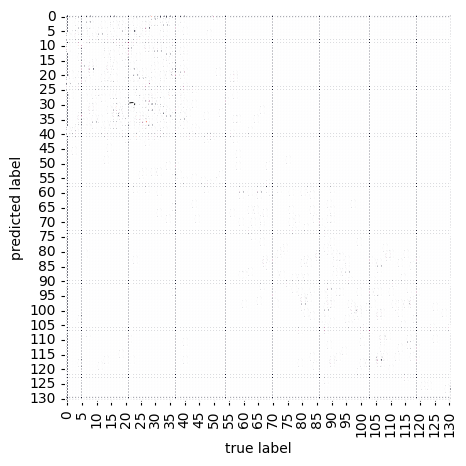

In [ ]:
import seaborn as sns
mat = confusion_matrix(y_test,y_pred)
plt.subplots(figsize = (5,5))
sns.heatmap(mat.T, square = True, annot = True, fmt='d', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
data= dataset.drop(columns=['label','N','K'])

In [ ]:
data

,P,temperature,humidity,ph,rainfall
0,42,20.879744,82.002744,6.502985,202.935536
1,58,21.770462,80.319644,7.038096,226.655537
2,55,23.004459,82.320763,7.840207,263.964248
3,35,26.491096,80.158363,6.980401,242.864034
4,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...
2195,34,26.774637,66.413269,6.780064,177.774507
2196,15,27.417112,56.636362,6.086922,127.924610
2197,33,24.131797,67.225123,6.362608,173.322839
2198,32,26.272418,52.127394,6.758793,127.175293


In [ ]:
y = data.iloc[:,0].values
x = data.drop(columns = data.columns[0]).values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [ ]:
print(x_train)

[[ 23.80834611  83.91902605   6.6912681   70.97358303]
 [ 41.94865736  81.15595212   5.63832848  73.06862952]
 [ 29.39982732  64.25510719   7.10845012  67.47677295]
 ...
 [ 28.47442276  63.53604453   6.50014496  69.5274407 ]
 [ 25.43459777  69.12613376   7.6859593   41.02682925]
 [ 17.24944623  91.13772765   6.54319181 112.5090516 ]]


In [ ]:
print(x_test)

[[ 26.2148837   87.6883982    6.41905219  59.65590798]
 [ 24.64458469  85.49938185   6.34394252  48.31219031]
 [  9.72445761  83.74765639   6.15868941  74.46411148]
 ...
 [ 23.32293161  53.00366334   7.16709259 168.2644287 ]
 [ 29.69952329  95.21224392   6.34246371 148.3003692 ]
 [ 24.692258    93.87030088   6.29790758 104.6735454 ]]


In [ ]:
print(y_train)

[ 56 122  68 ...  64  65  22]


In [ ]:
print(y_test)

[ 14  12 121  73  66  52  41  60  20  83  51  22  67  40  16 137  33  65
  33  23  19  58  68  39  56  34  77  16  36  78  11  44  60  17   8  38
  20  15  16  57  57  63  70   5  67  35  77  67  43  44  43  71 138  27
  69  88  48  36  76  39  21  59   7  47  12 141 130  26 142  18  21  20
  60  44 134  55  80  43  55  31  50  57   5  20  10  52  57  75  49  66
  67  53  46 136  59  60  33  43  69  60  11  41  41  88  71  43   8  31
  64  30  16  31  36 142  18  27  39  63  44  60  10  73  24  79  72  61
  22  20  70  48  45  47  26  43  55  53  11  18  25  76  60 121 140  15
  64 139  36  26  16  62  12  10  46  93   6  73  16  55 137  48  71  77
  47  68  73  12  36  25  74  25  72 126  45  28  43  59  78  25  57  16
  38  57  68  74  77  86   8  64  39  47  57  50  59  46  52  29  55   6
  74  24  28  24  46  45  56  14  18  51  71  95  68  60  55  27  35  53
  35  64  22  19  35  57  63  65  73  31  35  30  24  35  56  53   7  65
  26   6  26  54  37  60  55  39 139  77  62  50  2

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
print(x_train)

[[-0.33478022  0.56115786  0.28639844 -0.58838147]
 [ 3.30046554  0.43651791 -1.09903674 -0.55053196]
 [ 0.78573023 -0.3258651   0.83531751 -0.65155552]
 ...
 [ 0.60028286 -0.35830141  0.03492274 -0.61450776]
 [-0.0088859  -0.10613716  1.5951916  -1.12940532]
 [-1.64915751  0.88678747  0.09156286  0.16200634]]


In [ ]:
print(x_test)

[[ 0.0355496   0.71904875 -0.04678219 -0.81129998]
 [-0.26340875  0.62187789 -0.13911029 -1.02250906]
 [-3.10394848  0.54411846 -0.36683151 -0.53558551]
 ...
 [-0.51502914 -0.82061334  0.87274174  1.21088592]
 [ 0.69896602  1.05303372 -0.1409281   0.83917439]
 [-0.25433256  0.99346461 -0.19569845  0.02688501]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.03272727272727273

In [ ]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

'              precision    recall  f1-score   support\n\n           5       0.00      0.00      0.00         5\n           6       0.00      0.00      0.00         4\n           7       0.11      0.20      0.14         5\n           8       0.00      0.00      0.00         7\n           9       0.00      0.00      0.00         3\n          10       0.00      0.00      0.00         4\n          11       0.00      0.00      0.00         7\n          12       0.00      0.00      0.00         6\n          13       0.00      0.00      0.00         3\n          14       0.00      0.00      0.00         5\n          15       0.00      0.00      0.00         3\n          16       0.00      0.00      0.00        10\n          17       0.00      0.00      0.00         7\n          18       0.00      0.00      0.00         7\n          19       0.50      0.33      0.40         6\n          20       0.00      0.00      0.00         9\n          21       0.00      0.00      0.00         8\n       

In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(34.47222222222222, 0.5, 'predicted label')

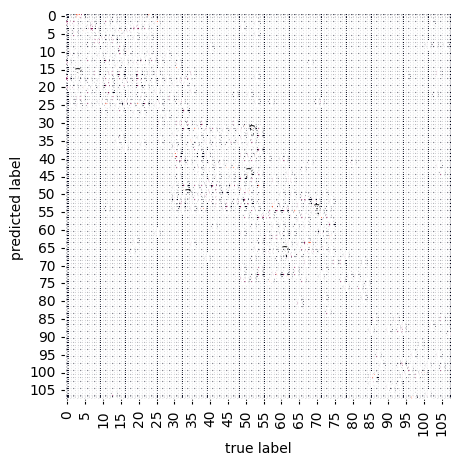

In [ ]:
import seaborn as sns
mat = confusion_matrix(y_test,y_pred)
plt.subplots(figsize = (5,5))
sns.heatmap(mat.T, square = True, annot = True, fmt='d', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
data= dataset.drop(columns=['label','P','N'])

In [ ]:
data

,K,temperature,humidity,ph,rainfall
0,43,20.879744,82.002744,6.502985,202.935536
1,41,21.770462,80.319644,7.038096,226.655537
2,44,23.004459,82.320763,7.840207,263.964248
3,40,26.491096,80.158363,6.980401,242.864034
4,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...
2195,32,26.774637,66.413269,6.780064,177.774507
2196,27,27.417112,56.636362,6.086922,127.924610
2197,30,24.131797,67.225123,6.362608,173.322839
2198,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y = data.iloc[:,0].values
x = data.drop(columns = data.columns[0]).values


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [ ]:
print(x_train)

[[ 23.80834611  83.91902605   6.6912681   70.97358303]
 [ 41.94865736  81.15595212   5.63832848  73.06862952]
 [ 29.39982732  64.25510719   7.10845012  67.47677295]
 ...
 [ 28.47442276  63.53604453   6.50014496  69.5274407 ]
 [ 25.43459777  69.12613376   7.6859593   41.02682925]
 [ 17.24944623  91.13772765   6.54319181 112.5090516 ]]


In [ ]:
print(x_test)

[[ 26.2148837   87.6883982    6.41905219  59.65590798]
 [ 24.64458469  85.49938185   6.34394252  48.31219031]
 [  9.72445761  83.74765639   6.15868941  74.46411148]
 ...
 [ 23.32293161  53.00366334   7.16709259 168.2644287 ]
 [ 29.69952329  95.21224392   6.34246371 148.3003692 ]
 [ 24.692258    93.87030088   6.29790758 104.6735454 ]]


In [ ]:
print(y_train)

[ 18 196  19 ...  15  23   9]


In [ ]:
print(y_test)

[ 50  46 203  79  17  41  19  24  51  46  18  26  20  24  25 204  33  19
  25  28  31  23  19  43  20  32  20   8  22  23  36  41  22  48  28  15
  26  30  49  17  24  18  21  47  18  21  25  15  18  16  23  24 195  48
  19  51  45  27  20  24  11  15  48  44  46 195 195  30 203  14  35  38
  25  21 204  25  83  23  43  32  37  19  52  55  49  19  25  22  22  49
  25  44  24 195  25  19  30  38  23  85  11  36  20  52  47  39  50  31
  22  51  51  27  25 203   6  44  22  17  21  38  45  15  15  77  77  15
  43  10  84  48  15  17  47  22  15  22  29  42  14  22  25 199 197  27
  78 205  44  26  45  47   8  33  15  46  41  77  46  19 200  36  19  23
  38  23  22  47  45  51  45  14  22 196  20  30  16  25  20  36  53   6
  36  55  55  19  17  51  30  20  38  55  24  44  20  42  17  30  18  29
  85  34  33  41  22  22  17   8  51  24  24  50  81  17  19   9  20  17
  31  55  47  43  44  41  19  48  25  30  23  25  14  39  17  16  10  16
  39  33  31  20  18  43  78  17 199  21  25  41  4

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[-0.33478022,  0.56115786,  0.28639844, -0.58838147],
       [ 3.30046554,  0.43651791, -1.09903674, -0.55053196],
       [ 0.78573023, -0.3258651 ,  0.83531751, -0.65155552],
       ...,
       [ 0.60028286, -0.35830141,  0.03492274, -0.61450776],
       [-0.0088859 , -0.10613716,  1.5951916 , -1.12940532],
       [-1.64915751,  0.88678747,  0.09156286,  0.16200634]])

In [ ]:
x_test

array([[ 0.0355496 ,  0.71904875, -0.04678219, -0.81129998],
       [-0.26340875,  0.62187789, -0.13911029, -1.02250906],
       [-3.10394848,  0.54411846, -0.36683151, -0.53558551],
       ...,
       [-0.51502914, -0.82061334,  0.87274174,  1.21088592],
       [ 0.69896602,  1.05303372, -0.1409281 ,  0.83917439],
       [-0.25433256,  0.99346461, -0.19569845,  0.02688501]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators = 500)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.06909090909090909

In [ ]:
model.predict([[23.004459,	82.320763,	7.840207,	263.964248]])

array([45])

In [ ]:
model.predict([[24.131797,	67.225123,	6.362608,	173.322839]])

array([45])

In [ ]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

'              precision    recall  f1-score   support\n\n           5       0.20      0.50      0.29         2\n           6       0.00      0.00      0.00         2\n           7       0.00      0.00      0.00         1\n           8       0.00      0.00      0.00         4\n           9       0.00      0.00      0.00         2\n          10       0.00      0.00      0.00         3\n          11       0.00      0.00      0.00         4\n          12       0.00      0.00      0.00         0\n          13       0.00      0.00      0.00         1\n          14       0.00      0.00      0.00         4\n          15       0.12      0.09      0.10        23\n          16       0.00      0.00      0.00        13\n          17       0.00      0.00      0.00        21\n          18       0.00      0.00      0.00        14\n          19       0.17      0.14      0.15        21\n          20       0.04      0.05      0.04        22\n          21       0.03      0.12      0.05         8\n       

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

Text(34.47222222222222, 0.5, 'predicted label')

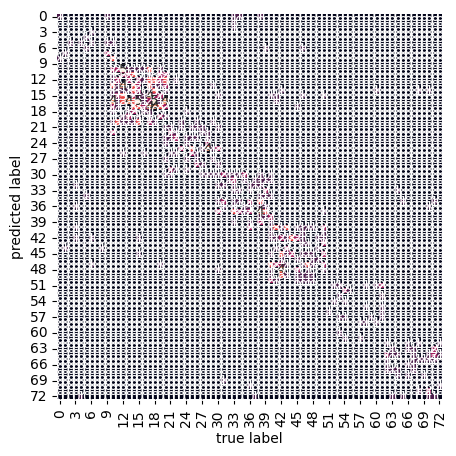

In [ ]:
import seaborn as sns
mat = confusion_matrix(y_test,y_pred)
plt.subplots(figsize = (5,5))
sns.heatmap(mat.T, square = True, annot = True, fmt='d', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')